# Kern–Frenkel model in HPMC

## Overview

### Questions
* How do I implement pairwise energetic interactions in HPMC?

### Objectives
* Implement arbitrary pairwise energetic interactions in HPMC simulations in HOOMD-Blue.

## Boilerplate code

In [3]:
import hoomd
import matplotlib
import numpy

%matplotlib inline
matplotlib.style.use('ggplot')

## The Kern–Frenkel model
The Kern–Frenkel model contains directional pairwise energetic interactions in addition to hard sphere-like volume exclusion.
The pair potential $u_{ij}(r_{ij}, \Omega_i, \Omega_j)$ between particles $i$ and $j$ at a center-to-center distance $r_{ij}$ and orientations $\Omega_i$ and $\Omega_j$ is of the form
$$
u_{ij}(r_{ij}, \Omega_i, \Omega_j) = u_{ij}^{\mathrm{hssw}} \cdot f(\Omega_i, \Omega_j),
$$
where $u_{ij}^{\mathrm{hssw}}$ is the hard sphere plus square well potential:
$$
u_{ij}^{\mathrm{hssw}} = 
\begin{cases}
\infty & r_{ij} < \sigma_{ij} \\
-\varepsilon & \sigma_{ij} <= r_{ij} < \lambda_{ij}\sigma_{ij} \\
0 & r_{ij} > \lambda_{ij}\sigma_{ij}
\end{cases}
$$
where $\sigma_{ij}$ is sum of the radii of particles $i$ and $j$ and $\lambda$ is the range of the square well attraction, and $f(\Omega_i, \Omega_j)$ is an orientational masking function given by
$$
f(\Omega_1, \Omega_2) = 
\begin{cases}
1 & \mathrm{any~} \hat{e}_\alpha^{(i)} \cdot \hat{r}_{ij} > \cos \delta \mathrm{~and~any~} \hat{e}_\beta^{(j)} \cdot \hat{r}_{ji} > \cos \delta \\
0 & \mathrm{otherwise}
\end{cases}
$$
where $\hat{e}_{\alpha}^{(i)}$ is the "director" of any patch $\alpha$ on particle $i$ and $\delta$ is the half-opening angle of the patch.

Graphically, this pair potential corresponds to the following criterion: two particles interact with energy $-\varepsilon$ if the blue shaded regions on the two particles overlap, $\infty$ if the black shaded regions on the two particles overlap, and zero otherwise.

In [152]:
def draw_kern_frenkel_particle(ax, xy, sigma, kf_lambda, kf_delta, kf_director):
    theta_director = numpy.rad2deg(numpy.arctan2(kf_director[1], kf_director[0]))
    wedge = matplotlib.patches.Wedge(
        xy,
        sigma*kf_lambda,
        theta_director-kf_delta,
        theta_director+kf_delta,
        alpha=0.5,
        zorder=1,
    )
    wedge = ax.add_patch(wedge)
    ax.set_axis_off()
    ax.set_aspect('equal')
    circle = matplotlib.patches.Circle(xy, sigma, fc='#111111', zorder=2)
    ax.add_patch(circle)
    new_extent = kf_lambda*sigma + max(xy)
    old_extent = ax.get_xlim()[1]
    extent = max(new_extent, old_extent)
    ax.set_xlim(-extent, extent)
    ax.set_ylim(-extent, extent)
    return circle

Hence, this pair configuation is disallowed by the hard sphere part of the potential:

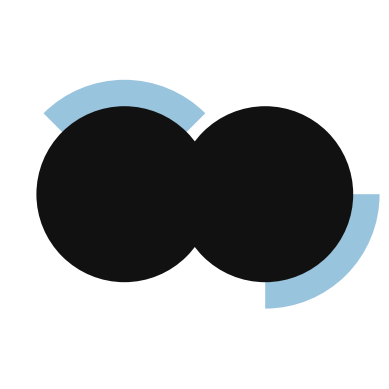

In [153]:
fig, ax = matplotlib.pyplot.subplots()
draw_kern_frenkel_particle(ax, (-0.8, 0), 1, 1.3, 45, (0, 1))
draw_kern_frenkel_particle(ax, (0.8, 0), 1, 1.3, 45, (1, -1))

The following pair configuration is interacting with energy $\varepsilon$:

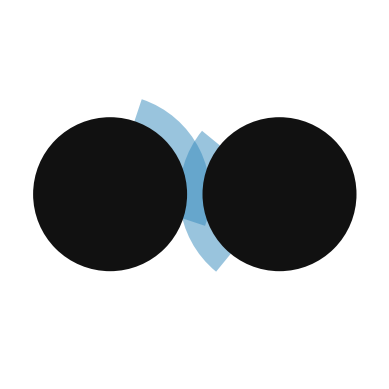

In [150]:
fig, ax = matplotlib.pyplot.subplots()
draw_kern_frenkel_particle(ax, (-1.1, 0), 1, 1.3, 45, (2, 1))
draw_kern_frenkel_particle(ax, (1.1, 0), 1, 1.3, 45, (-1, -0.1))

And the following three pair configuartions are each non-interacting:


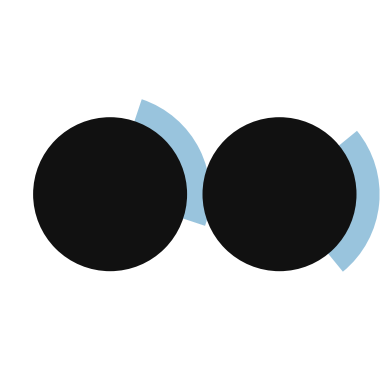

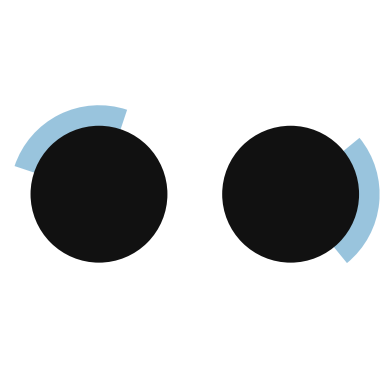

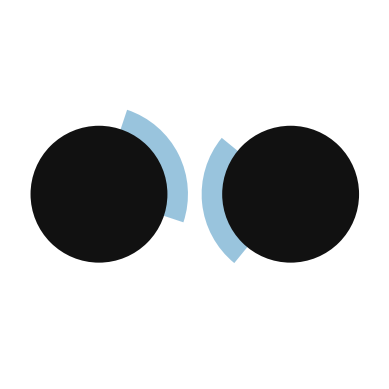

In [151]:
fig, ax = matplotlib.pyplot.subplots()
draw_kern_frenkel_particle(ax, (-1.1, 0), 1, 1.3, 45, (2, 1))
draw_kern_frenkel_particle(ax, (1.1, 0), 1, 1.3, 45, (1, -0.1))

fig, ax = matplotlib.pyplot.subplots()
draw_kern_frenkel_particle(ax, (-1.4, 0), 1, 1.3, 45, (-1, 2))
draw_kern_frenkel_particle(ax, (1.4, 0), 1, 1.3, 45, (1, -0.1))

fig, ax = matplotlib.pyplot.subplots()
draw_kern_frenkel_particle(ax, (-1.4, 0), 1, 1.3, 45, (2, 1))
draw_kern_frenkel_particle(ax, (1.4, 0), 1, 1.3, 45, (-1, -0.1))